# Keras - Dense neural network (Advanced)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_valsneset_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 35 columns):
VALS-Valsneset..-G1-T4015A3 -0104       5237 non-null float64
VALS-Valsneset..-G2-T4015A3 -0104       5237 non-null float64
VALS-Valsneset..-G3-T4015A3 -0104       5237 non-null float64
VALS-Valsneset..-G4-T4015A3 -0104       5237 non-null float64
VALS-Valsneset..-G5-T4015A3 -0104       5237 non-null float64
RRS.S2451.Gunit.M1 G1.AVL               5237 non-null int64
RRS.S2451.Gunit.M2 G1.AVL               5237 non-null int64
RRS.S2451.Gunit.M3 G1.AVL               5237 non-null int64
RRS.S2451.Gunit.M4 G1.AVL               5237 non-null int64
RRS.S2451.Gunit.M5 G1.AVL               5237 non-null int64
VALS-Valsneset..-GS1-5-T4015A3 -0104    5237 non-null float64
DNMI_71550...........T0015A3-0120       5237 non-null float64
/arome_windvel_6372_0961                5190 non-null float64
DNMI_65940...........T0015A3-0120       5237 non-null float64
/arome_windvel_6385_0846           

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5183 entries, 5 to 5236
Data columns (total 35 columns):
VALS-Valsneset..-G1-T4015A3 -0104       5183 non-null float64
VALS-Valsneset..-G2-T4015A3 -0104       5183 non-null float64
VALS-Valsneset..-G3-T4015A3 -0104       5183 non-null float64
VALS-Valsneset..-G4-T4015A3 -0104       5183 non-null float64
VALS-Valsneset..-G5-T4015A3 -0104       5183 non-null float64
RRS.S2451.Gunit.M1 G1.AVL               5183 non-null int64
RRS.S2451.Gunit.M2 G1.AVL               5183 non-null int64
RRS.S2451.Gunit.M3 G1.AVL               5183 non-null int64
RRS.S2451.Gunit.M4 G1.AVL               5183 non-null int64
RRS.S2451.Gunit.M5 G1.AVL               5183 non-null int64
VALS-Valsneset..-GS1-5-T4015A3 -0104    5183 non-null float64
DNMI_71550...........T0015A3-0120       5183 non-null float64
/arome_windvel_6372_0961                5183 non-null float64
DNMI_65940...........T0015A3-0120       5183 non-null float64
/arome_windvel_6385_0846           

In [4]:
num_features = len(data.columns) -1
print(num_features)

34


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3628 samples, validate on 1555 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 2.78134, saving model to checkpoint_model_advanced.h5
0s - loss: 3.8316 - val_loss: 2.7813
Epoch 2/10000
Epoch 00001: val_loss improved from 2.78134 to 1.42589, saving model to checkpoint_model_advanced.h5
0s - loss: 2.2336 - val_loss: 1.4259
Epoch 3/10000
Epoch 00002: val_loss improved from 1.42589 to 1.26506, saving model to checkpoint_model_advanced.h5
0s - loss: 1.2926 - val_loss: 1.2651
Epoch 4/10000
Epoch 00003: val_loss improved from 1.26506 to 1.25583, saving model to checkpoint_model_advanced.h5
0s - loss: 1.2398 - val_loss: 1.2558
Epoch 5/10000
Epoch 00004: val_loss improved from 1.25583 to 1.24012, saving model to checkpoint_model_advanced.h5
0s - loss: 1.2185 - val_loss: 1.2401
Epoch 6/10000
Epoch 00005: val_loss improved from 1.24012 to 1.23001, saving model to checkpoint_model_advanced.h5
0s - loss: 1.2038 - val_loss: 1.2300
Epoch 7/10000
Epoch 00006: val_loss improved

Epoch 00071: val_loss did not improve
0s - loss: 1.0315 - val_loss: 1.1120
Epoch 73/10000
Epoch 00072: val_loss did not improve
0s - loss: 1.0318 - val_loss: 1.0939
Epoch 74/10000
Epoch 00073: val_loss did not improve
0s - loss: 1.0187 - val_loss: 1.0942
Epoch 75/10000
Epoch 00074: val_loss did not improve
0s - loss: 1.0216 - val_loss: 1.1083
Epoch 76/10000
Epoch 00075: val_loss did not improve
0s - loss: 1.0254 - val_loss: 1.0959
Epoch 77/10000
Epoch 00076: val_loss improved from 1.09270 to 1.09248, saving model to checkpoint_model_advanced.h5
0s - loss: 1.0265 - val_loss: 1.0925
Epoch 78/10000
Epoch 00077: val_loss did not improve
0s - loss: 1.0296 - val_loss: 1.1507
Epoch 79/10000
Epoch 00078: val_loss improved from 1.09248 to 1.08903, saving model to checkpoint_model_advanced.h5
0s - loss: 1.0260 - val_loss: 1.0890
Epoch 80/10000
Epoch 00079: val_loss did not improve
0s - loss: 1.0292 - val_loss: 1.0938
Epoch 81/10000
Epoch 00080: val_loss improved from 1.08903 to 1.08551, saving m

0s - loss: 0.9746 - val_loss: 1.0742
Epoch 157/10000
Epoch 00156: val_loss did not improve
0s - loss: 0.9711 - val_loss: 1.0788
Epoch 158/10000
Epoch 00157: val_loss improved from 1.07424 to 1.07412, saving model to checkpoint_model_advanced.h5
0s - loss: 0.9792 - val_loss: 1.0741
Epoch 159/10000
Epoch 00158: val_loss did not improve
0s - loss: 0.9908 - val_loss: 1.1310
Epoch 160/10000
Epoch 00159: val_loss did not improve
0s - loss: 0.9743 - val_loss: 1.0742
Epoch 161/10000
Epoch 00160: val_loss did not improve
0s - loss: 0.9718 - val_loss: 1.0907
Epoch 162/10000
Epoch 00161: val_loss did not improve
0s - loss: 0.9720 - val_loss: 1.0884
Epoch 163/10000
Epoch 00162: val_loss did not improve
0s - loss: 1.0086 - val_loss: 1.0970
Epoch 164/10000
Epoch 00163: val_loss did not improve
0s - loss: 0.9841 - val_loss: 1.0816
Epoch 165/10000
Epoch 00164: val_loss did not improve
0s - loss: 0.9737 - val_loss: 1.0773
Epoch 166/10000
Epoch 00165: val_loss did not improve
0s - loss: 0.9644 - val_los

Epoch 00247: val_loss did not improve
0s - loss: 0.9458 - val_loss: 1.0963
Epoch 249/10000
Epoch 00248: val_loss did not improve
0s - loss: 0.9514 - val_loss: 1.0759
Epoch 250/10000
Epoch 00249: val_loss did not improve
0s - loss: 0.9462 - val_loss: 1.0912
Epoch 251/10000
Epoch 00250: val_loss did not improve
0s - loss: 0.9386 - val_loss: 1.0862
Epoch 252/10000
Epoch 00251: val_loss did not improve
0s - loss: 0.9256 - val_loss: 1.1121
Epoch 253/10000
Epoch 00252: val_loss did not improve
0s - loss: 0.9229 - val_loss: 1.0897
Epoch 254/10000
Epoch 00253: val_loss did not improve
0s - loss: 0.9221 - val_loss: 1.0923
Epoch 255/10000
Epoch 00254: val_loss did not improve
0s - loss: 0.9338 - val_loss: 1.0780
Epoch 256/10000
Epoch 00255: val_loss did not improve
0s - loss: 0.9338 - val_loss: 1.0754
Epoch 257/10000
Epoch 00256: val_loss did not improve
0s - loss: 0.9161 - val_loss: 1.0969
Epoch 258/10000
Epoch 00257: val_loss did not improve
0s - loss: 0.9274 - val_loss: 1.0822
Epoch 259/10000

Epoch 00339: val_loss did not improve
0s - loss: 0.8983 - val_loss: 1.0939
Epoch 341/10000
Epoch 00340: val_loss did not improve
0s - loss: 0.8958 - val_loss: 1.0880
Epoch 342/10000
Epoch 00341: val_loss did not improve
0s - loss: 0.8876 - val_loss: 1.0776
Epoch 343/10000
Epoch 00342: val_loss did not improve
0s - loss: 0.8830 - val_loss: 1.1033
Epoch 344/10000
Epoch 00343: val_loss improved from 1.06915 to 1.06499, saving model to checkpoint_model_advanced.h5
0s - loss: 0.9057 - val_loss: 1.0650
Epoch 345/10000
Epoch 00344: val_loss did not improve
0s - loss: 0.8854 - val_loss: 1.1236
Epoch 346/10000
Epoch 00345: val_loss did not improve
0s - loss: 0.8856 - val_loss: 1.0877
Epoch 347/10000
Epoch 00346: val_loss did not improve
0s - loss: 0.8967 - val_loss: 1.0903
Epoch 348/10000
Epoch 00347: val_loss did not improve
0s - loss: 0.8967 - val_loss: 1.1124
Epoch 349/10000
Epoch 00348: val_loss did not improve
0s - loss: 0.8913 - val_loss: 1.1116
Epoch 350/10000
Epoch 00349: val_loss did n

Epoch 00430: val_loss did not improve
0s - loss: 0.8733 - val_loss: 1.1144
Epoch 432/10000
Epoch 00431: val_loss did not improve
0s - loss: 0.8674 - val_loss: 1.0779
Epoch 433/10000
Epoch 00432: val_loss did not improve
0s - loss: 0.8622 - val_loss: 1.0831
Epoch 434/10000
Epoch 00433: val_loss did not improve
0s - loss: 0.8531 - val_loss: 1.1100
Epoch 435/10000
Epoch 00434: val_loss did not improve
0s - loss: 0.8470 - val_loss: 1.0965
Epoch 436/10000
Epoch 00435: val_loss did not improve
0s - loss: 0.8486 - val_loss: 1.0782
Epoch 437/10000
Epoch 00436: val_loss did not improve
0s - loss: 0.8496 - val_loss: 1.1065
Epoch 438/10000
Epoch 00437: val_loss did not improve
0s - loss: 0.8621 - val_loss: 1.1040
Epoch 439/10000
Epoch 00438: val_loss did not improve
0s - loss: 0.8474 - val_loss: 1.0825
Epoch 440/10000
Epoch 00439: val_loss did not improve
0s - loss: 0.8483 - val_loss: 1.0833
Epoch 441/10000
Epoch 00440: val_loss did not improve
0s - loss: 0.8367 - val_loss: 1.0928
Epoch 442/10000

Epoch 00522: val_loss did not improve
0s - loss: 0.8065 - val_loss: 1.0891
Epoch 524/10000
Epoch 00523: val_loss did not improve
0s - loss: 0.8151 - val_loss: 1.1184
Epoch 525/10000
Epoch 00524: val_loss did not improve
0s - loss: 0.8152 - val_loss: 1.1001
Epoch 526/10000
Epoch 00525: val_loss did not improve
0s - loss: 0.8154 - val_loss: 1.1158
Epoch 527/10000
Epoch 00526: val_loss did not improve
0s - loss: 0.8140 - val_loss: 1.1013
Epoch 528/10000
Epoch 00527: val_loss did not improve
0s - loss: 0.8343 - val_loss: 1.0808
Epoch 529/10000
Epoch 00528: val_loss did not improve
0s - loss: 0.8257 - val_loss: 1.1153
Epoch 530/10000
Epoch 00529: val_loss did not improve
0s - loss: 0.8269 - val_loss: 1.1020
Epoch 531/10000
Epoch 00530: val_loss did not improve
0s - loss: 0.8190 - val_loss: 1.1026
Epoch 532/10000
Epoch 00531: val_loss did not improve
0s - loss: 0.8112 - val_loss: 1.0841
Epoch 533/10000
Epoch 00532: val_loss did not improve
0s - loss: 0.8168 - val_loss: 1.0808
Epoch 534/10000

Epoch 00614: val_loss did not improve
0s - loss: 0.7921 - val_loss: 1.0974
Epoch 616/10000
Epoch 00615: val_loss did not improve
0s - loss: 0.8007 - val_loss: 1.0985
Epoch 617/10000
Epoch 00616: val_loss did not improve
0s - loss: 0.7892 - val_loss: 1.0880
Epoch 618/10000
Epoch 00617: val_loss did not improve
0s - loss: 0.8030 - val_loss: 1.1058
Epoch 619/10000
Epoch 00618: val_loss did not improve
0s - loss: 0.7912 - val_loss: 1.1060
Epoch 620/10000
Epoch 00619: val_loss did not improve
0s - loss: 0.7760 - val_loss: 1.0970
Epoch 621/10000
Epoch 00620: val_loss did not improve
0s - loss: 0.7798 - val_loss: 1.1074
Epoch 622/10000
Epoch 00621: val_loss did not improve
0s - loss: 0.7881 - val_loss: 1.1190
Epoch 623/10000
Epoch 00622: val_loss did not improve
0s - loss: 0.8013 - val_loss: 1.0943
Epoch 624/10000
Epoch 00623: val_loss did not improve
0s - loss: 0.7874 - val_loss: 1.1017
Epoch 625/10000
Epoch 00624: val_loss did not improve
0s - loss: 0.7901 - val_loss: 1.0988
Epoch 626/10000

Epoch 00706: val_loss did not improve
0s - loss: 0.7585 - val_loss: 1.0923
Epoch 708/10000
Epoch 00707: val_loss did not improve
0s - loss: 0.7684 - val_loss: 1.1089
Epoch 709/10000
Epoch 00708: val_loss did not improve
0s - loss: 0.7767 - val_loss: 1.0895
Epoch 710/10000
Epoch 00709: val_loss did not improve
0s - loss: 0.7711 - val_loss: 1.0995
Epoch 711/10000
Epoch 00710: val_loss did not improve
0s - loss: 0.7840 - val_loss: 1.0884
Epoch 712/10000
Epoch 00711: val_loss did not improve
0s - loss: 0.7638 - val_loss: 1.0926
Epoch 713/10000
Epoch 00712: val_loss did not improve
0s - loss: 0.7717 - val_loss: 1.0983
Epoch 714/10000
Epoch 00713: val_loss did not improve
0s - loss: 0.7544 - val_loss: 1.1041
Epoch 715/10000
Epoch 00714: val_loss did not improve
0s - loss: 0.7742 - val_loss: 1.1042
Epoch 716/10000
Epoch 00715: val_loss did not improve
0s - loss: 0.7627 - val_loss: 1.0966
Epoch 717/10000
Epoch 00716: val_loss did not improve
0s - loss: 0.7695 - val_loss: 1.0919
Epoch 718/10000

Epoch 00798: val_loss did not improve
0s - loss: 0.7381 - val_loss: 1.0902
Epoch 800/10000
Epoch 00799: val_loss did not improve
0s - loss: 0.7379 - val_loss: 1.1083
Epoch 801/10000
Epoch 00800: val_loss did not improve
0s - loss: 0.7447 - val_loss: 1.1126
Epoch 802/10000
Epoch 00801: val_loss did not improve
0s - loss: 0.7361 - val_loss: 1.1118
Epoch 803/10000
Epoch 00802: val_loss did not improve
0s - loss: 0.7490 - val_loss: 1.0988
Epoch 804/10000
Epoch 00803: val_loss did not improve
0s - loss: 0.7520 - val_loss: 1.0976
Epoch 805/10000
Epoch 00804: val_loss did not improve
0s - loss: 0.7547 - val_loss: 1.1112
Epoch 806/10000
Epoch 00805: val_loss did not improve
0s - loss: 0.7373 - val_loss: 1.0819
Epoch 807/10000
Epoch 00806: val_loss did not improve
0s - loss: 0.7402 - val_loss: 1.0881
Epoch 808/10000
Epoch 00807: val_loss did not improve
0s - loss: 0.7358 - val_loss: 1.1173
Epoch 809/10000
Epoch 00808: val_loss did not improve
0s - loss: 0.7462 - val_loss: 1.1024
Epoch 810/10000

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_advanced.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 1.06499
Mean Squared Error: 			 2.86967
Root Mean Squared Error: 		 1.69401


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 0.877065
Mean Squared Error: 			 2.13352
Root Mean Squared Error: 		 1.46066


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

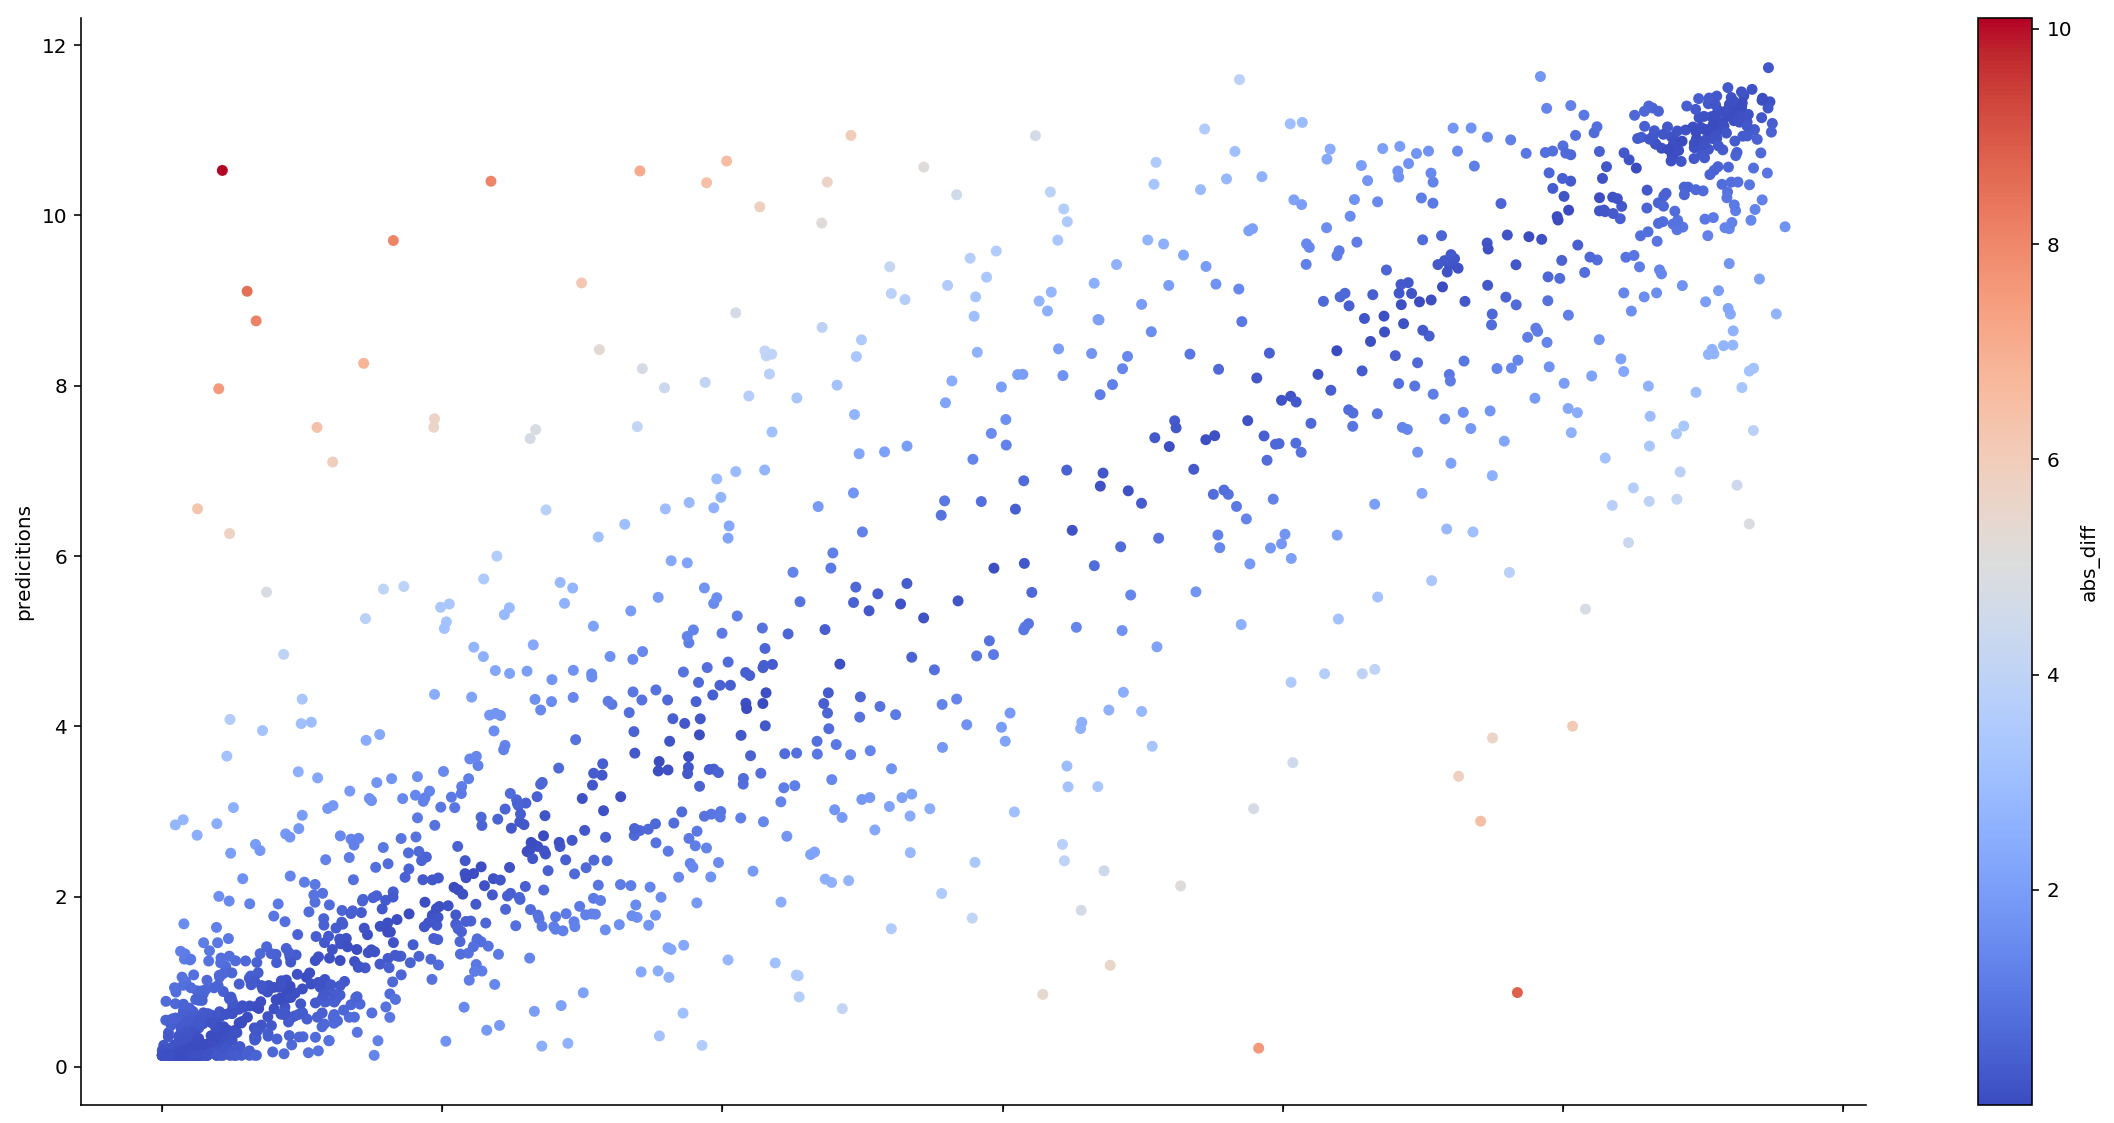

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

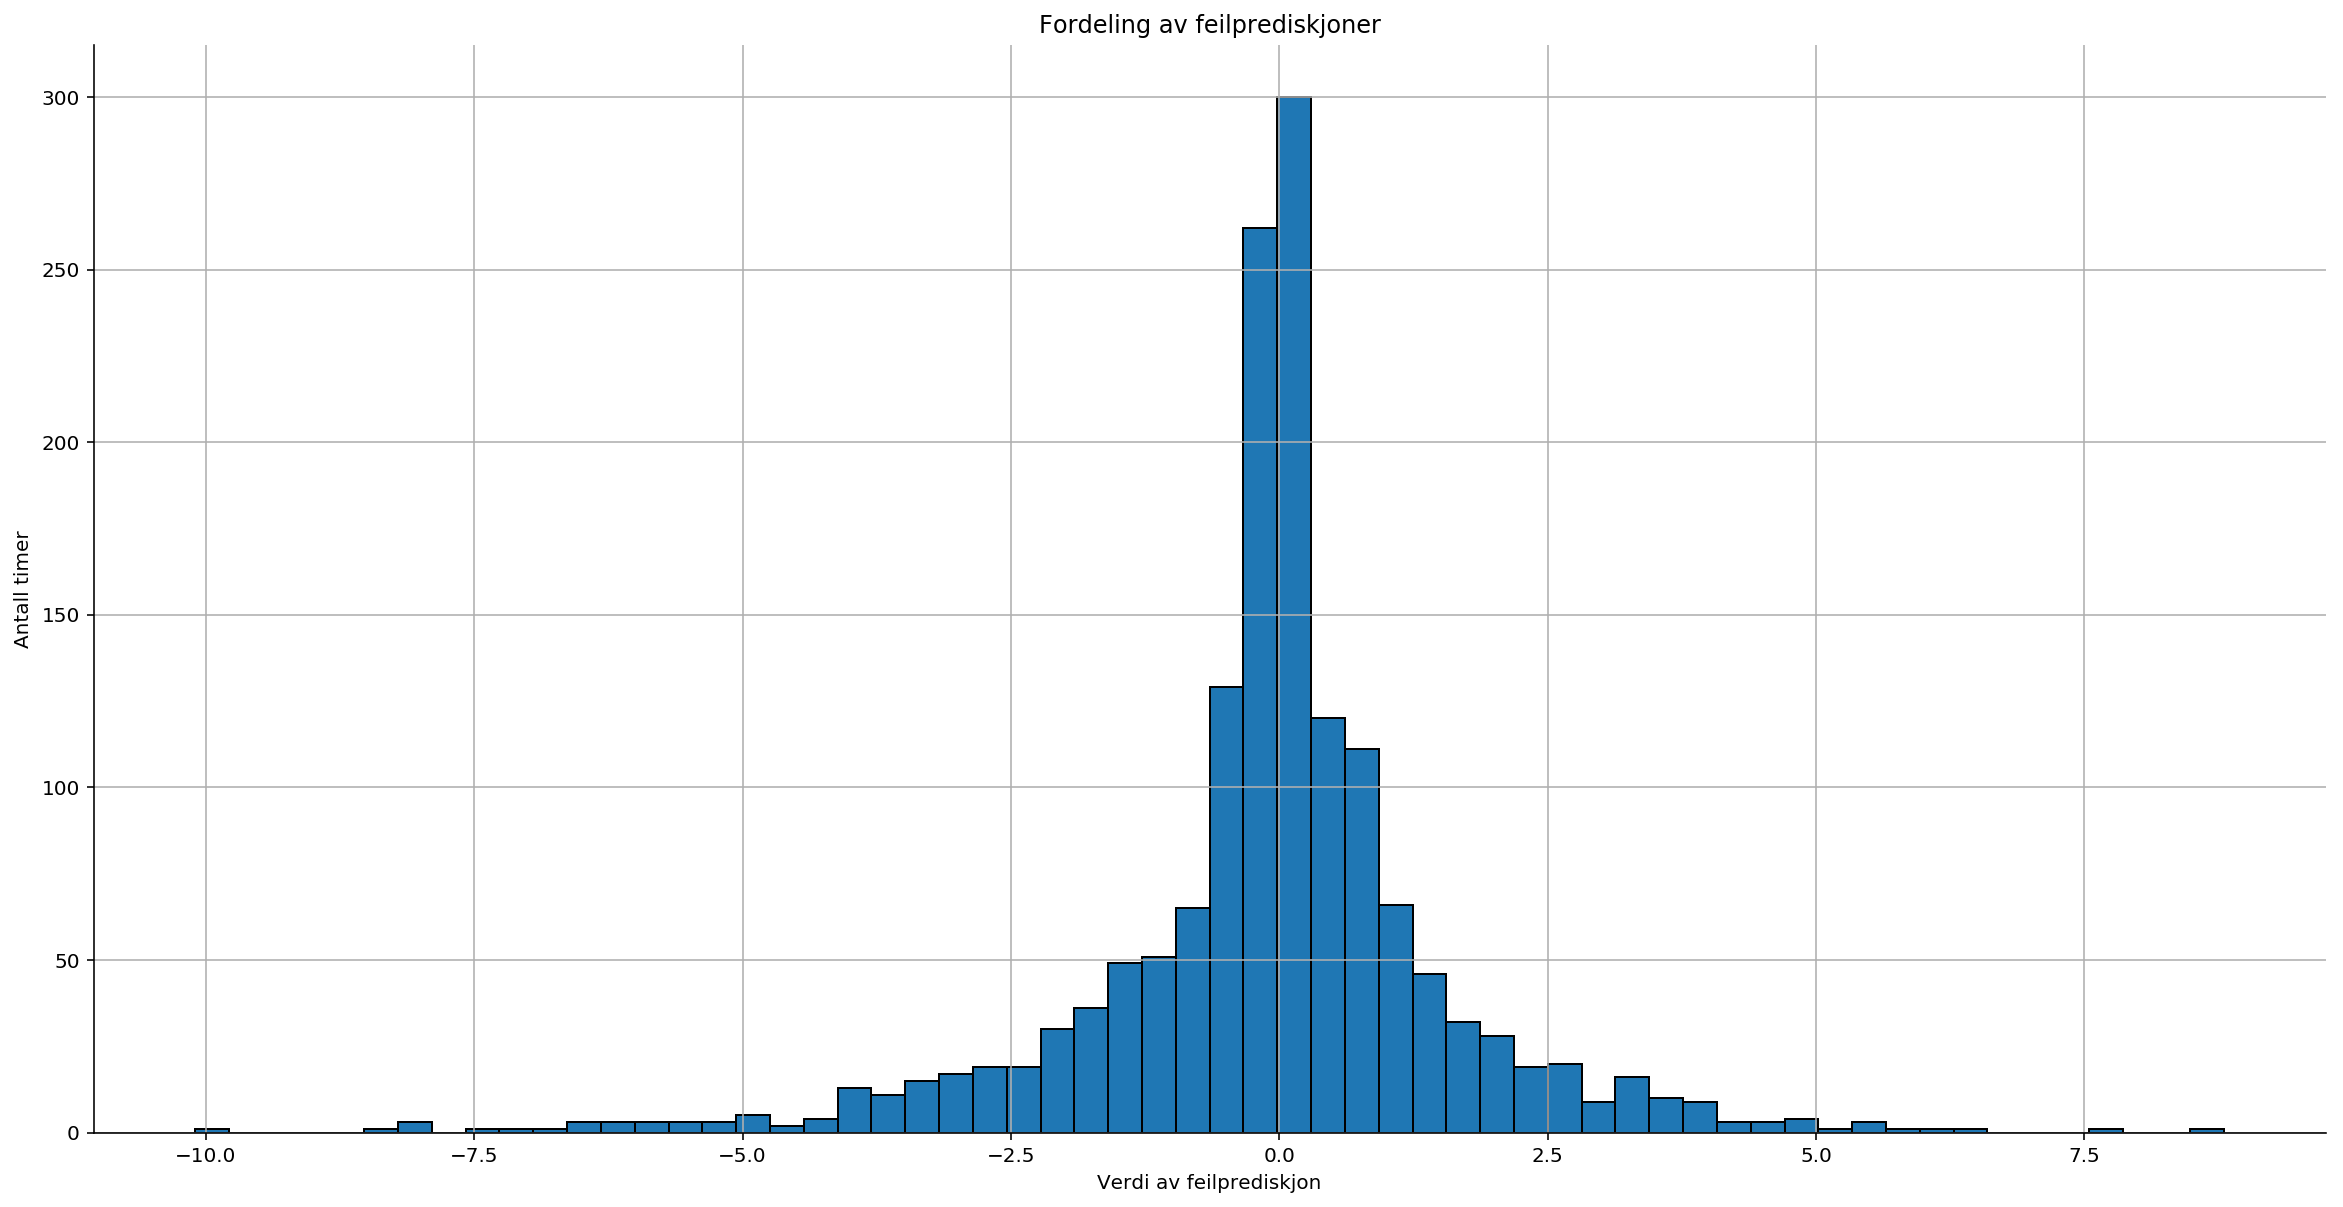

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

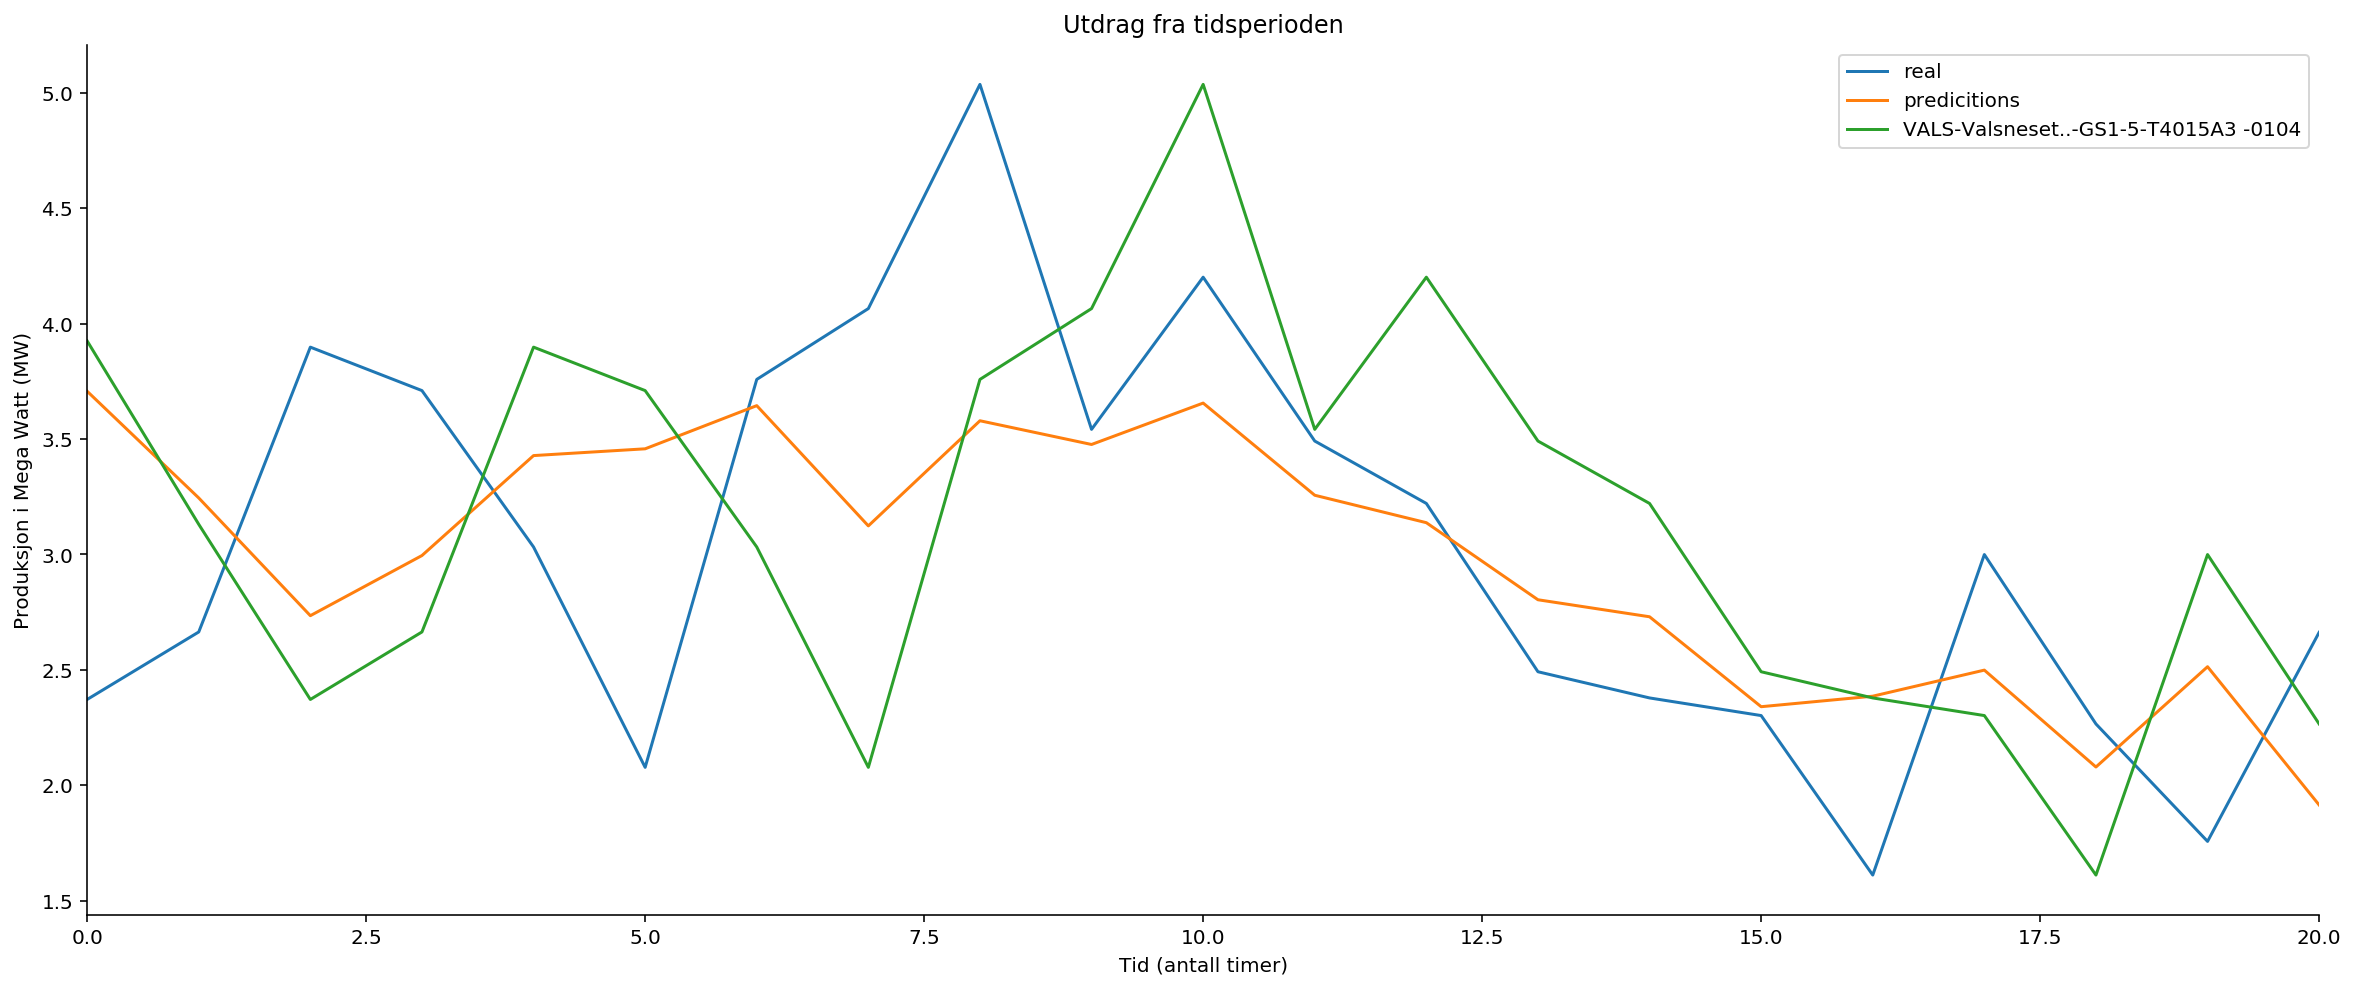

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'VALS-Valsneset..-GS1-5-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')